In [3]:
pip install scipy

   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
    --------------------------------------- 0.8/41.2 MB 5.6 MB/s eta 0:00:08
   --- ------------------------------------ 3.4/41.2 MB 10.1 MB/s eta 0:00:04
   ----- ---------------------------------- 6.0/41.2 MB 11.2 MB/s eta 0:00:04
   -------- ------------------------------- 8.9/41.2 MB 12.0 MB/s eta 0:00:03
   ----------- ---------------------------- 11.8/41.2 MB 12.1 MB/s eta 0:00:03
   ------------- -------------------------- 14.4/41.2 MB 12.2 MB/s eta 0:00:03
   ---------------- ----------------------- 17.3/41.2 MB 12.4 MB/s eta 0:00:02
   ------------------- -------------------- 20.2/41.2 MB 12.5 MB/s eta 0:00:02
   ---------------------- ----------------- 22.8/41.2 MB 12.5 MB/s eta 0:00:02
   ------------------------ --------------- 25.4/41.2 MB 12.7 MB/s eta 0:00:02
   --------------------------- ------------ 28.0/41.2 MB 12.7 MB/s eta 0:00:02
   ------------------------------ --------- 30.9/41.2 MB 12.7 MB/s

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.2.2 requires joblib>=1.1.1, which is not installed.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, ConfusionMatrixDisplay

ModuleNotFoundError: No module named 'joblib'

In [149]:
# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [150]:
# Define ReLU function
def relu(x):
    return np.maximum(0, x)

# Define the derivative of ReLU
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [151]:
# Cross-entropy loss
def cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [1]:
# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

NameError: name 'np' is not defined

In [ ]:
# Generate XOR dataset with 10 variables (binary inputs)
n_samples = 1000
X = np.random.randint(0, 2, size=(n_samples, 10))
y = np.logical_xor.reduce(X, axis=1).astype(int).reshape(-1, 1)

In [167]:
# Network architecture
input_size = 10  
hidden_size = 5
output_size = 1
learning_rate = 0.01
epochs = 5000

In [168]:
# Initialize weights and biases
np.random.seed(0)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, hidden_size)
b2 = np.zeros((1, hidden_size))
W3 = np.random.randn(hidden_size, output_size)
b3 = np.zeros((1, output_size))

In [169]:
print(W1.shape)
print(W2.shape)
print(W3.shape)
print(Z1.shape)

(10, 5)
(5, 5)
(5, 1)
(4, 5)


In [170]:

# Training loop
losses = []

In [171]:
for epoch in range(epochs):
    # Forward propagation
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = sigmoid(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = sigmoid(Z3)
    
    # Compute loss
    loss = cross_entropy(y, A3)
    losses.append(loss)
    
    # Backpropagation
    dA3 = A3 - y
    dZ3 = dA3 * sigmoid_derivative(A3)
    dW3 = np.dot(A2.T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)
    
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)
    
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
    
    # Print loss every 500 epochs
    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

Epoch 0, Loss: 0.8329
Epoch 500, Loss: 0.6863
Epoch 1000, Loss: 0.6828
Epoch 1500, Loss: 0.6805
Epoch 2000, Loss: 0.6768
Epoch 2500, Loss: 0.6725
Epoch 3000, Loss: 0.6661
Epoch 3500, Loss: 0.6626
Epoch 4000, Loss: 0.6446
Epoch 4500, Loss: 0.5899


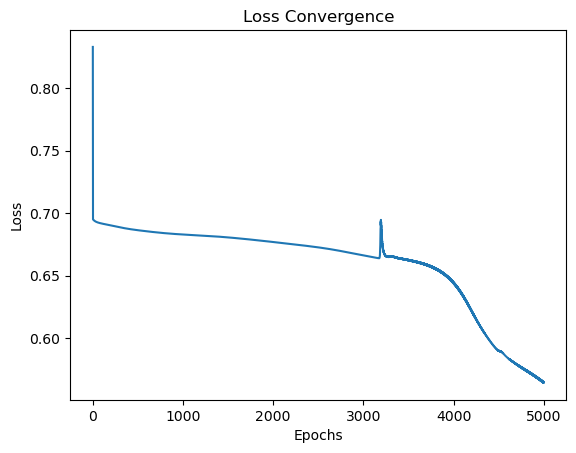

In [172]:
# Plot loss convergence
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Convergence")
plt.show()

Confusion Matrix:
[[411  70]
 [245 274]]


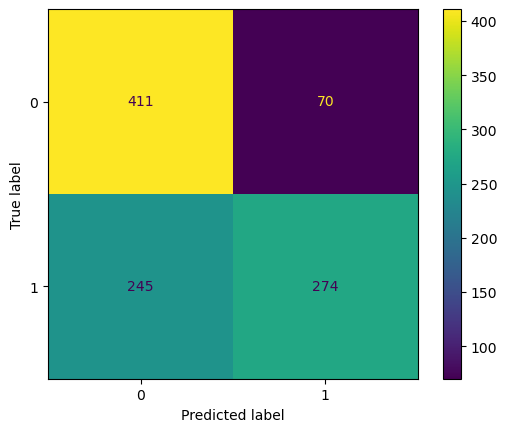

In [173]:
# Predictions
predictions = A3 > 0.5
cm = confusion_matrix(y, predictions)
print("Confusion Matrix:")
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [174]:

print("\nClassification Report:")
print(classification_report(y, predictions, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.6265    0.8545    0.7230       481
           1     0.7965    0.5279    0.6350       519

    accuracy                         0.6850      1000
   macro avg     0.7115    0.6912    0.6790      1000
weighted avg     0.7147    0.6850    0.6773      1000



In [175]:
print(W1)

[[ 2.0116613   3.98295502 -0.38889823  7.56531738  1.62787368]
 [-0.36025038  0.13646924  1.74103572 -2.17991495  1.24347537]
 [-0.47678341  0.16444204  3.6402237   2.23720374  0.41265148]
 [ 0.87078159  1.60738356 -0.40703315  2.58259218  0.59123432]
 [-2.32644571 -0.92991878  2.63892085 -2.10813932  2.86976337]
 [-4.01555394 -1.94271753 -1.51308679 -2.37109764  1.15614265]
 [ 0.500325   -0.47760111 -3.11974008 -6.61681206  0.81593196]
 [ 3.67623773  0.42539314 -0.65446906 -2.44856183 -2.5825024 ]
 [-1.42683554 -0.96630526 -2.54773549  6.54417707 -2.59684458]
 [-0.54821741 -1.03586917 -0.72719644 -6.63381519  2.18019829]]


In [180]:
I = [1,1,1,1,1,0,0,0,1,1]

In [181]:
ZZ= np.dot(I, W1) + b1

In [182]:
ZZ

array([[-1.94555584,  1.62840028,  4.83380624,  8.72976893,  3.38432347]])

In [183]:
dA3.shape

(1000, 1)